# geology mapview of TGR
plot the figure1 of TGR paper

In [1]:
import pygmt 
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from obspy import UTCDateTime

In [2]:
# read the data
file = 'TGR_data/tomoDD09/ph2dt/new.dat'
lines = open(file,'r').readlines()
catalog = []
for line in lines:
    tmp = line.split()
    if tmp[0] == '#':
        year,month,day,hour,minute = map(int,tmp[1:6])
        second,latitude,longitude,depth,magnitude = map(float,tmp[6:11])
        time = UTCDateTime(year,month,day,hour,minute,second)
        evtid = int(tmp[-1])
        catalog.append([evtid,longitude,latitude,depth,magnitude,time])
catalog = pd.DataFrame(catalog,columns=['evtid','longitude','latitude','depth','magnitude','time'])
catalog = catalog.sort_values(by='time')

# faults

# read the station
stations = pd.read_csv('TGR_data/tomoDD09/ph2dt/station.dat',sep='\s+',names=['name','latitude','longitude','elevation'])
bs_list = ['JJP','CJP','BJH','DTP','PYB','DPC','YGT','STP']
bs_stations = stations[stations.name.isin(bs_list)]

# read the cities
cities = pd.read_csv('TGR_data/geology/SX_citylonlat.txt',sep='\s+',encoding='gbk')
# read the gCAp
names=['x','y','longitude','latitude','depth','strike1','dip1','rake1','strike2','dip2','rake2',
       'magnitude','exp','plot_longitude','plot_latitude','name','label','time']
meca = pd.read_csv('TGR_data/gCAP/SanxiagCAP.gcmt',sep='\s+',skiprows=8,names=names)
meca

,x,y,longitude,latitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,magnitude,exp,plot_longitude,plot_latitude,name,label,time
0,-7.484448,10.156138,110.424116,31.090811,5.2,168,84,37,69,49,169,4.75,23,110:10,30:43,2013/12/16,Eq3,2013-12-16T13:04:51.616673Z
1,26.788592,-8.601576,110.791288,30.919061,6.5,341,60,52,139,68,12,4.38,23,110:30,30:43,2014/03/30,Eq2,2014-03-30T00:24:44.771455Z
2,26.697288,-8.334921,110.791276,30.915888,7.7,140,67,0,142,76,23,4.17,23,110:40,30:43,2014/03/27,Eq1,2014-03-27T00:20:04.877267Z


In [6]:
def plot_stratum(fig):
    fig.plot(data='TGR_data/geology/Permian.gmt',pen='0.1p',fill='247/207/138',close=True)
    fig.plot(data='TGR_data/geology/Triassic.gmt',pen='0.1p',fill='240/191/212',close=True)
    fig.plot(data='TGR_data/geology/Permian_sub.gmt',pen='0.1p',fill='247/207/138',close=True)
    fig.plot(data='TGR_data/geology/Presinian.gmt',pen='0.1p',fill='240/143/117',close=True)
    fig.plot(data='TGR_data/geology/Jurassic.gmt',pen='0.1p',fill='181/204/227',close=True)
    # plot the faults
    fig.plot(data=faults,pen='0.5p,red')
def plot_H4909(fig):
    # read the geological data
    file = 'TGR_data/geology/H4909.gpkg'
    H4909 = gpd.read_file(file, layer='strata').set_crs('EPSG:4326')
    faults = gpd.read_file(file, layer='faults_main').set_crs('EPSG:4326')
    # 清洗数据
    geology = H4909.copy()
    for i in range(len(H4909)):
        data = H4909.iloc[i]
        if data.geometry.is_empty:
            geology = geology.drop(index=i)
    geo_categories = {'Q':{'name':'Q','label':'Q','color':'255/248/128'},
                    'K':{'name':'K','label':'K','color':'128/207/92'},
                    'J':{'name':'J','label':'J','color':'51/189/233'},
                    'T':{'name':'T','label':'T','color':'138/62/164'},
                    'P':{'name':'P','label':'P-Cm','color':'231/77/64'},
                    'Pt':{'name':'Pt','label':'Presinian','color':'240/143/117'}}
    geo_categories = {'Q':{'name':'Q','label':'Quaternary','color':'255/248/128'},
                    'K':{'name':'K','label':'Cretaceous','color':'128/207/92'},
                    'J':{'name':'J','label':'Jurassic','color':'181/204/227'},
                    'P':{'name':'P','label':'Permian-Cambrian','color':'247/207/138'},
                    'T':{'name':'T','label':'Triassic','color':'240/191/212'},
                    'Pt':{'name':'Pt','label':'Precambrian','color':'240/143/117'}}
    for i,name in enumerate(list(geo_categories)):
        array = geology[geology.DSO == name]
        color = geo_categories[name]['color']
        label = geo_categories[name]['label']
        fig.plot(data=array,pen='0.1p',fill=color,close=True)
    # plot the faults
    fig.plot(data=faults,pen='0.5p,red')

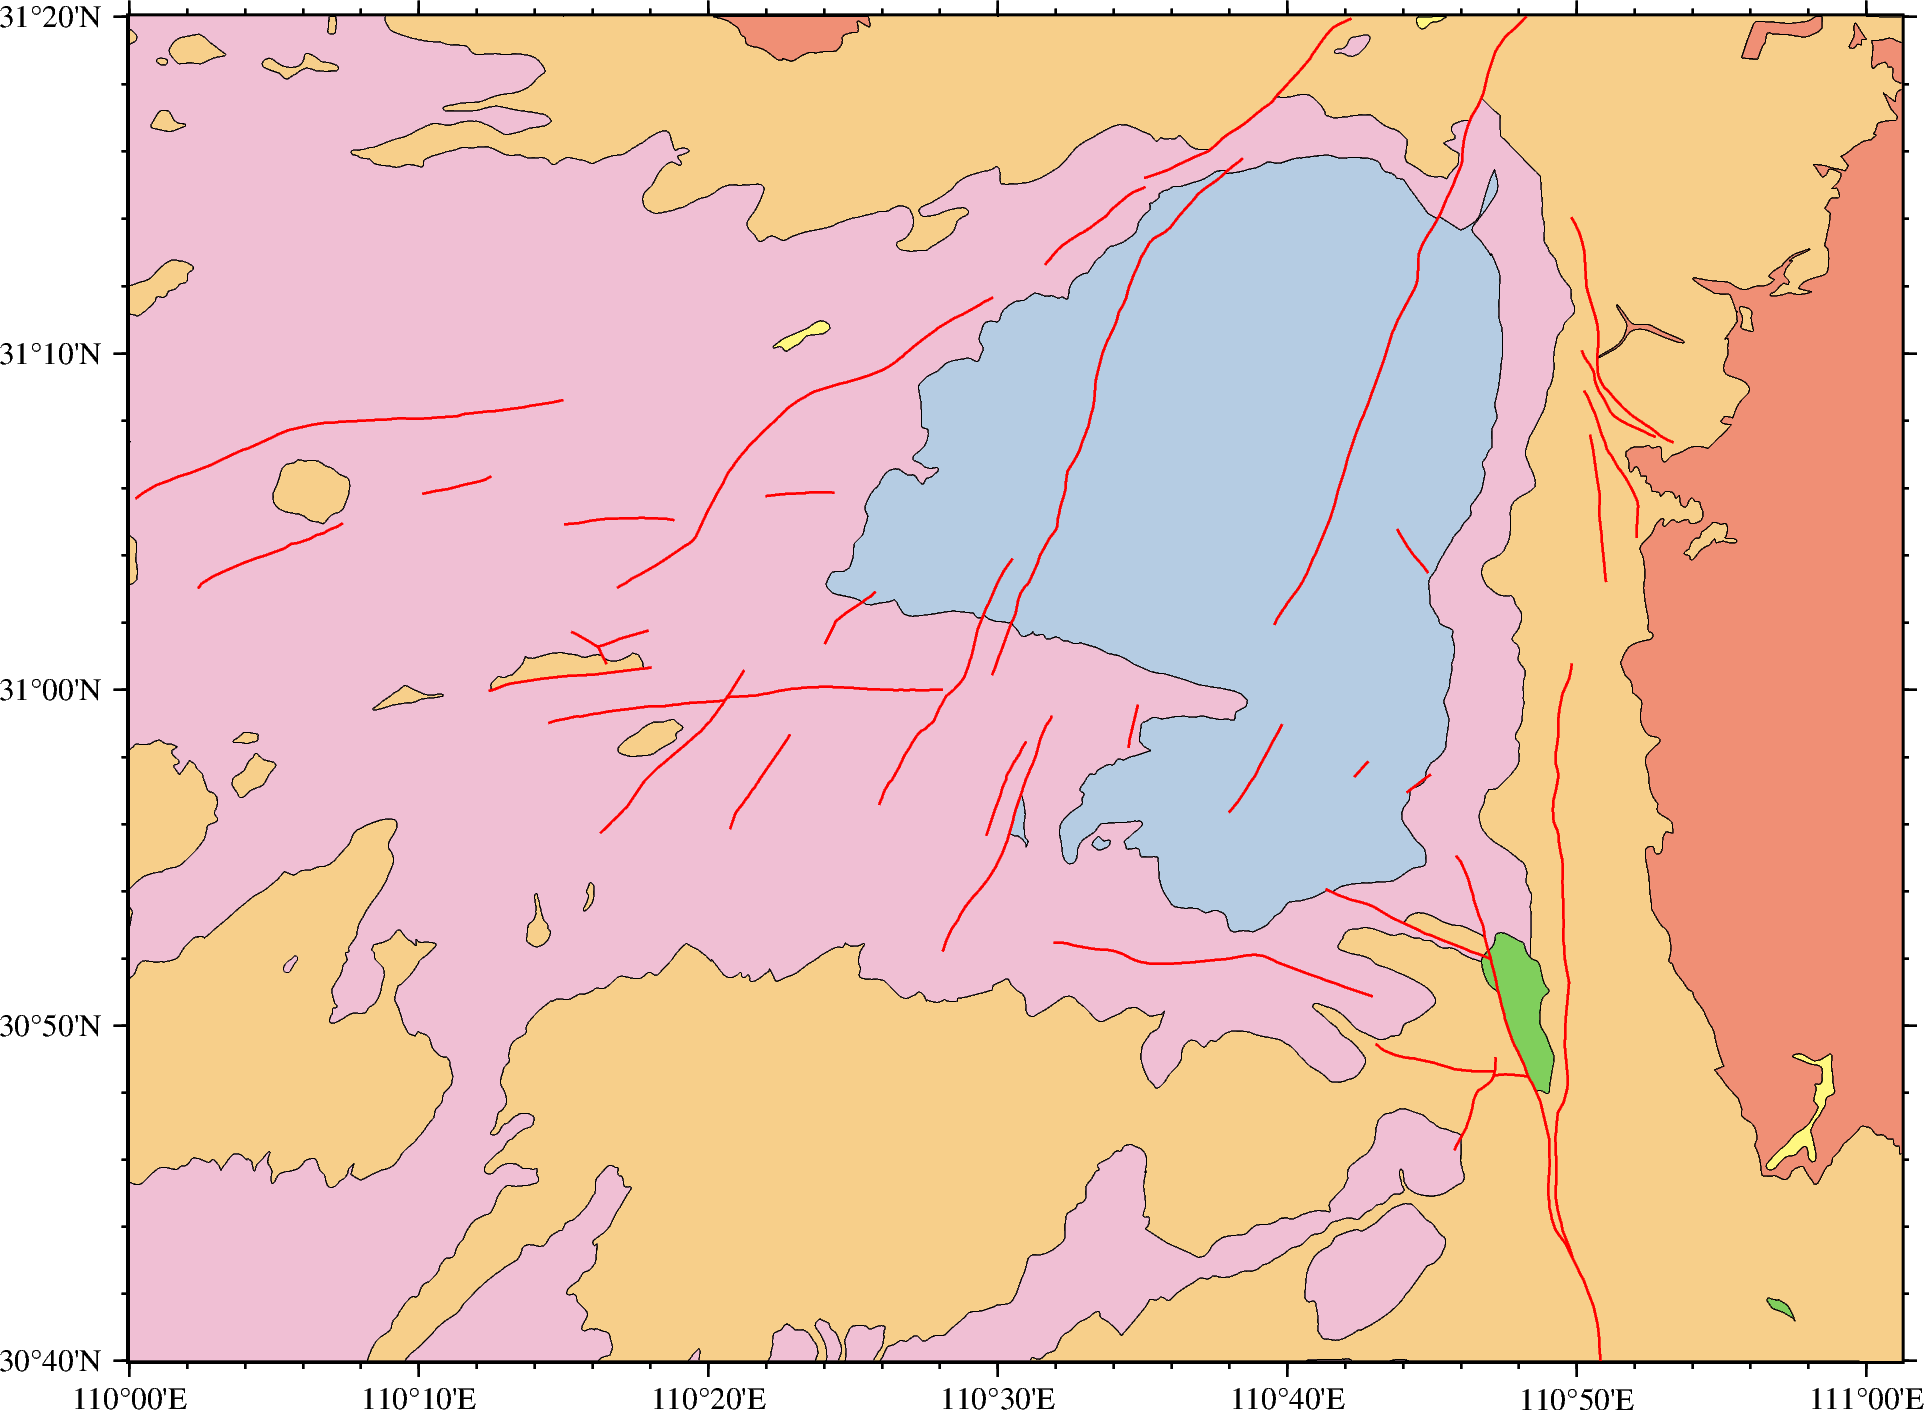

In [7]:
region = [110,111.02,30+40/60,31+20/60]
fig = pygmt.Figure()
pygmt.config(FONT='10p,4',FONT_ANNOT_PRIMARY='7.5p,4',MAP_FRAME_TYPE='plain')
fig.basemap(region=region,projection='M15c',frame=['af','WSen'])
with pygmt.clib.Session() as session:
    with pygmt.helpers.GMTTempFile() as tmpfile:
        session.call_module("mapproject", f"-Wh ->{tmpfile.name}")
        map_height = tmpfile.read().strip()
map_height = float(map_height)

# plot the stratum and faults
plot_H4909(fig)
fig.show()

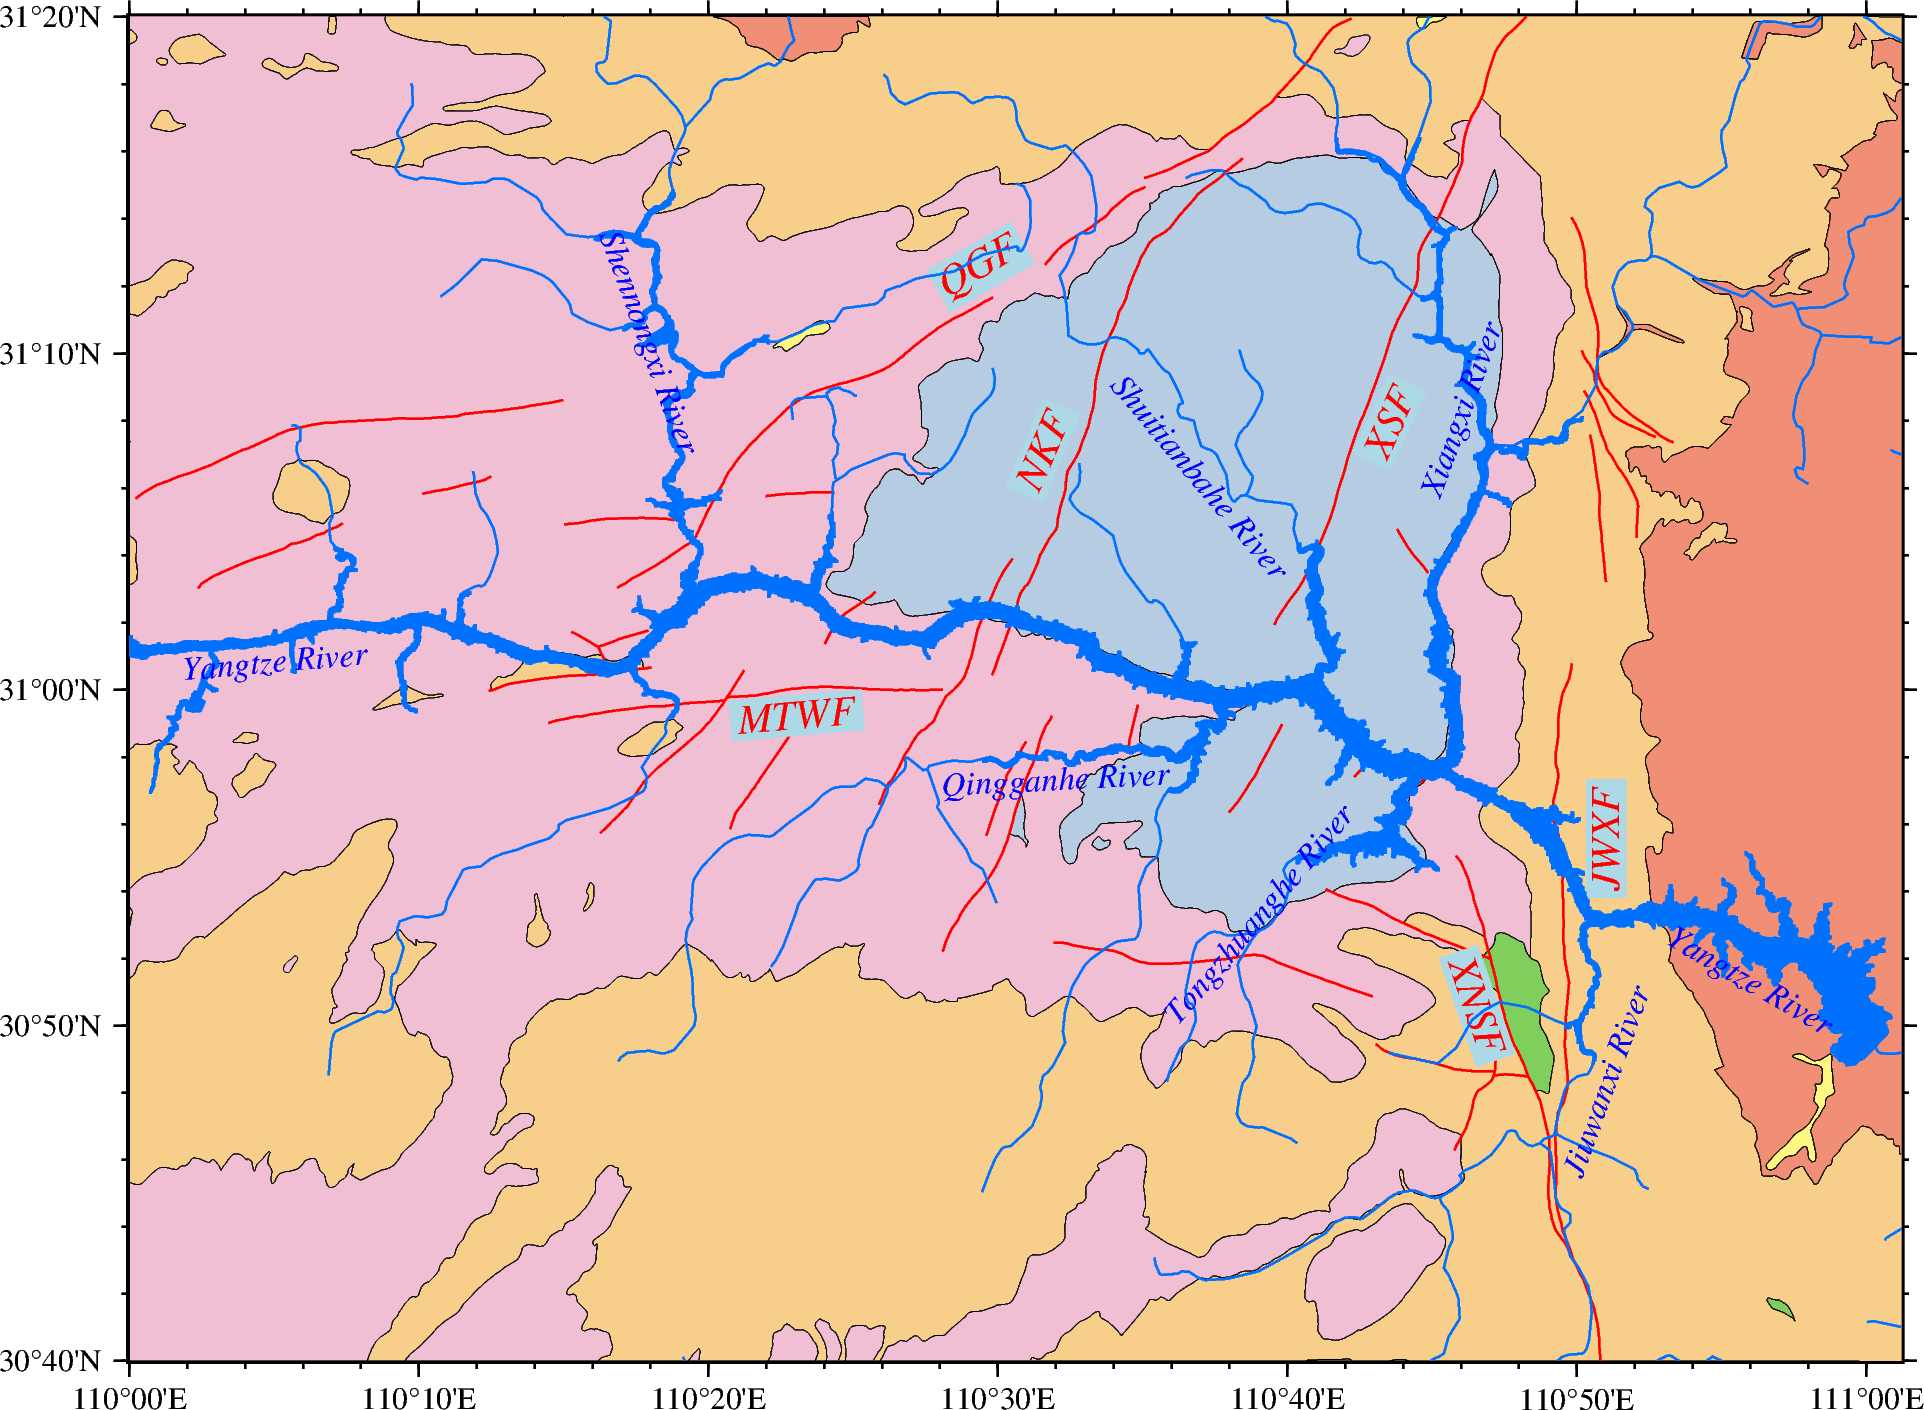

In [8]:
# mark the label of faults
fig.text(x=110+46/60,y=30+52/60,text='XNSF',font='10p,6,red',angle=-71,justify='ML',fill='lightblue')
fig.text(x=110+51/60,y=30+54/60,text='JWXF',font='10p,6,red',angle=90,justify='ML',fill='lightblue')
fig.text(x=110+43/60,y=30+67/60,text='XSF',font='10p,6,red',angle=65,justify='ML',fill='lightblue')
fig.text(x=110+31/60,y=30+66/60,text='NKF',font='10p,6,red',angle=67,justify='ML',fill='lightblue')
fig.text(x=110+28/60,y=30+72/60,text='QGF',font='10p,6,red',angle=30,justify='ML',fill='lightblue')
fig.text(x=110+21/60,y=30+59.1/60,text='MTWF',font='10p,6,red',angle=5,justify='ML',fill='lightblue')

# plot the rivers
#fig.plot(data='TGR_data/geology/HYDA.gmt',pen='0.1p',fill='0/112/255',close=True)
fig.plot(data='TGR_data/geology/Rivers.gmt',pen='0.5p,0/112/255',close=False) # Yangtze river
fig.plot(data='TGR_data/geology/TGR.shp',pen='0.5p,0/112/255',fill='0/112/255',close=False)


# mark the label of rivers
fig.text(x=110+5/60,y=31+0.5/60,text='Yangtze River',font='8p,6,blue',angle=5,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+56/60,y=30+51/60,text='Yangtze River',font='8p,6,blue',angle=-30,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+51/60,y=30+48/60,text='Jiuwanxi River',font='8p,6,blue',angle=70,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+46/60,y=31+8/60,text='Xiangxi River',font='8p,6,blue',angle=70,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+37/60,y=31+6/60,text='Shuitianbahe River',font='8p,6,blue',angle=-50,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+18/60,y=31+10/60,text='Shennongxi River',font='8p,6,blue',angle=-70,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+32/60,y=30+57/60,text='Qingganhe River',font='8p,6,blue',angle=3,justify='MC',offset='0.0c/0.1c')
fig.text(x=110+39/60,y=30+53/60,text='Tongzhuanghe River',font='8p,6,blue',angle=50,justify='MC',offset='0.0c/0.1c')
fig.show()

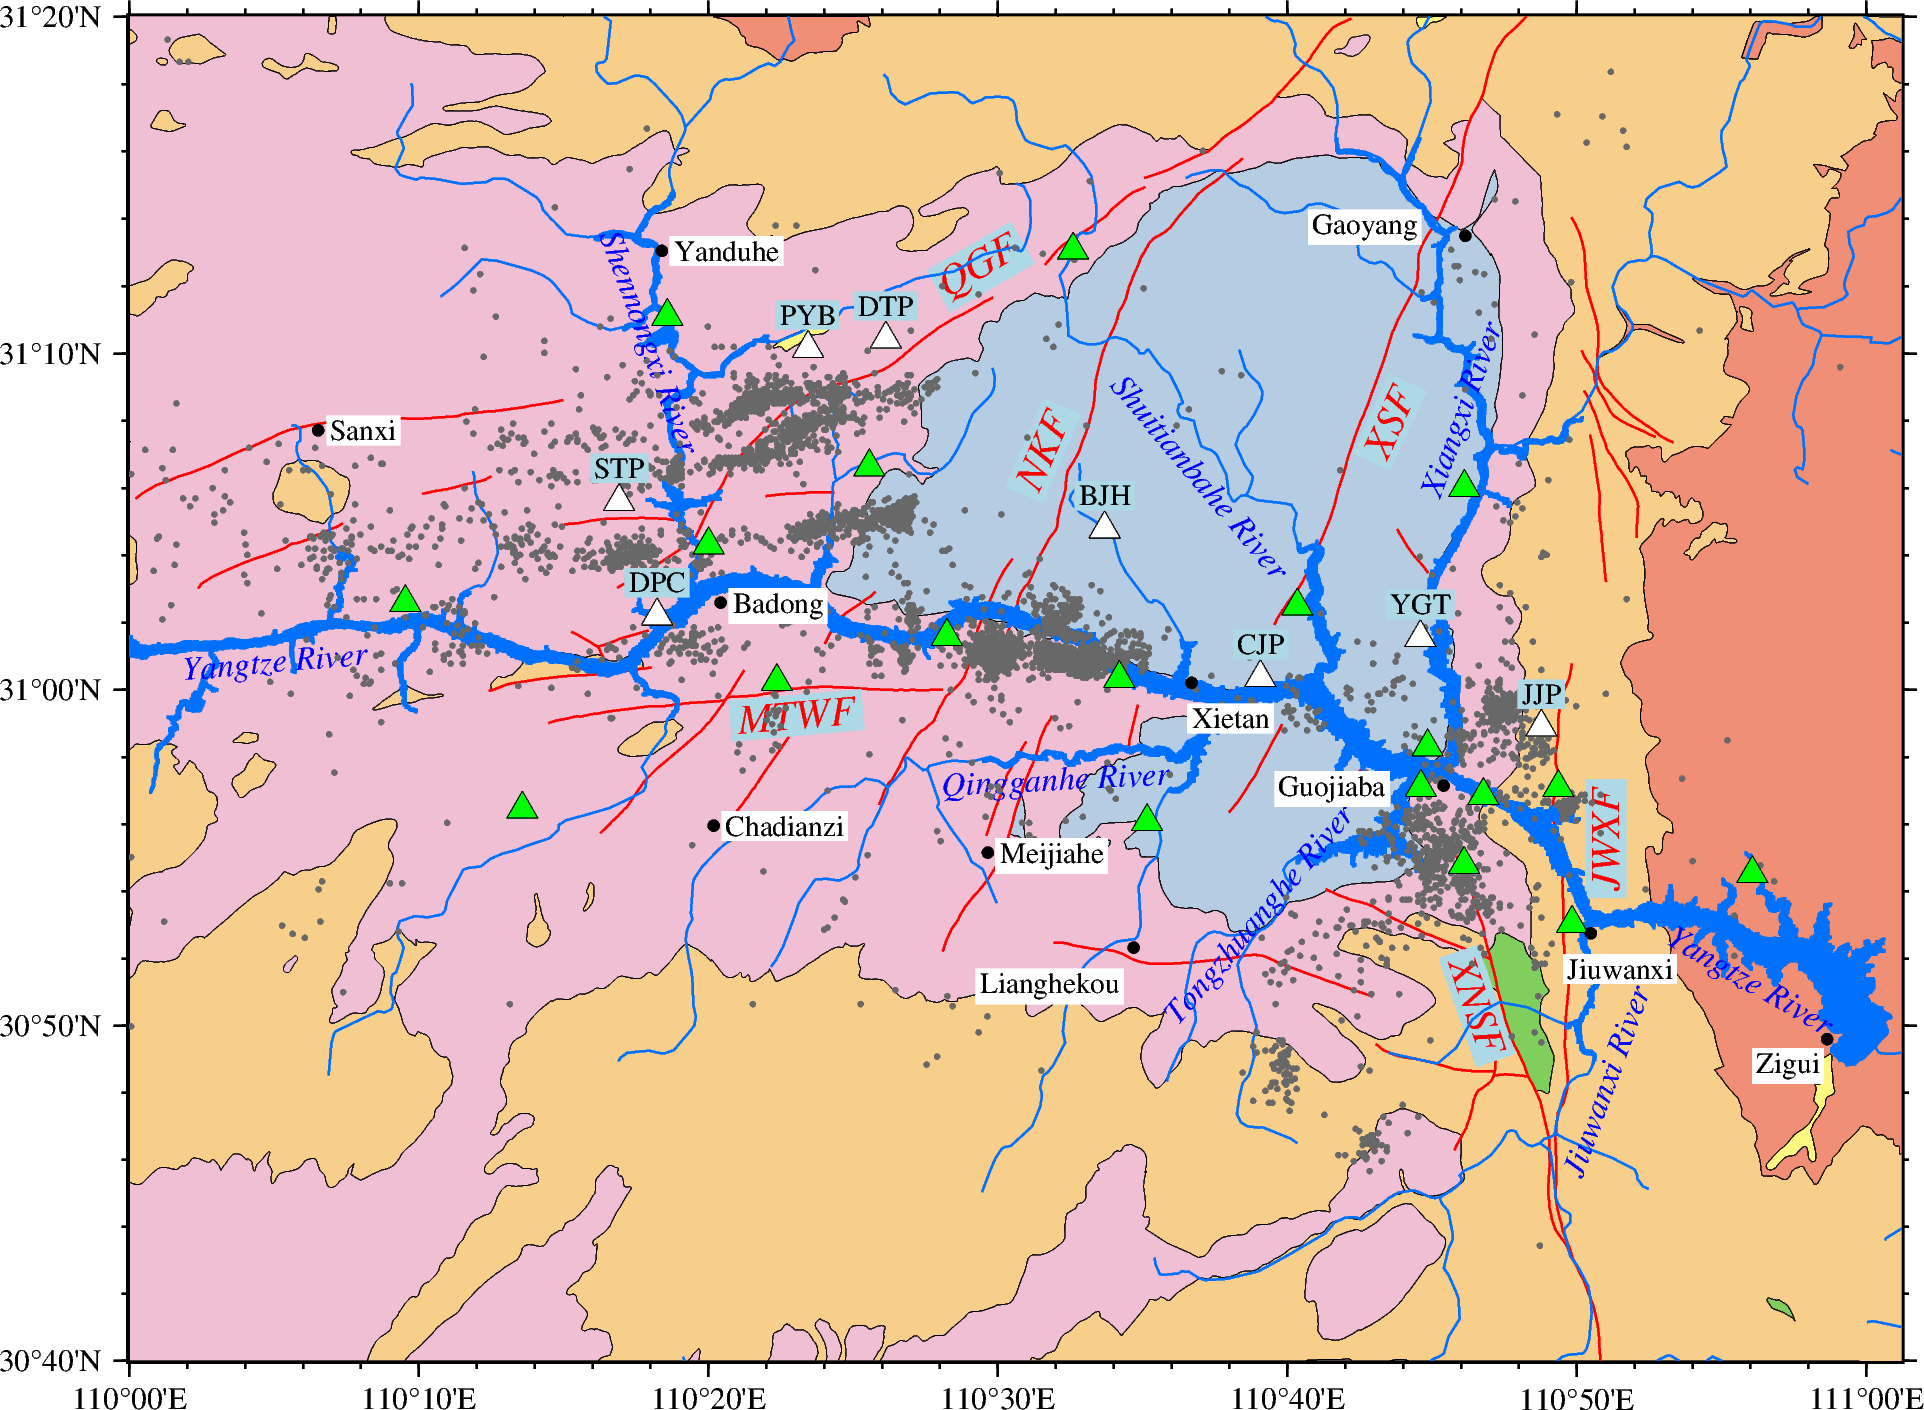

In [9]:
# plot the earthquakes
fig.plot(x=catalog.longitude,y=catalog.latitude,style='c0.02i',fill='104/104/104')
# plot the stations
fig.plot(x=stations.longitude,y=stations.latitude,style='t0.12i',fill='green',pen='0.1p,black')
# mark the stations of BS
fig.plot(x=bs_stations.longitude,y=bs_stations.latitude,style='t0.12i',fill='white',pen='0.1p,black')
fig.text(x=bs_stations.longitude,y=bs_stations.latitude,text=bs_stations.name,font='7p,4',justify='BC',offset='0.0c/0.2c',fill='lightblue')

# mark the main cites
#fig.plot(x=cities.longitude,y=cities.latitude,style='c0.04i',fill='black')
c_list = ['Sanxi','Yanduhe','Gaoyang','Badong','Chadianzi','Xietan','Meijiahe','Lianghekou','Guojiaba','Jiuwanxi','Zigui']
c_cities = cities[cities.name_en.isin(c_list)]
for i in range(len(c_cities)):
    line = c_cities.iloc[i]
    lon,lat,name = line.longitude,line.latitude,line.name_en
    justify = 'ML'
    offset = '0.1c/0.0c'
    if name =='Gaoyang':offset='-1.3c/0.1c'
    if name =='Xietan':offset='0.0c/-0.3c'
    if name == 'Lianghekou':offset='-1.3c/-0.3c'
    if name == 'Guojiaba':offset='-1.4c/0.0c'
    if name == 'Jiuwanxi':offset='-0.2c/-0.3c'
    if name == 'Zigui':offset='-0.6c/-0.2c'

    fig.text(x=lon,y=lat,text=name,font='7p',justify=justify,fill='white',offset=offset)
fig.plot(x=c_cities.longitude,y=c_cities.latitude,style='c0.04i',fill='black')
fig.show()

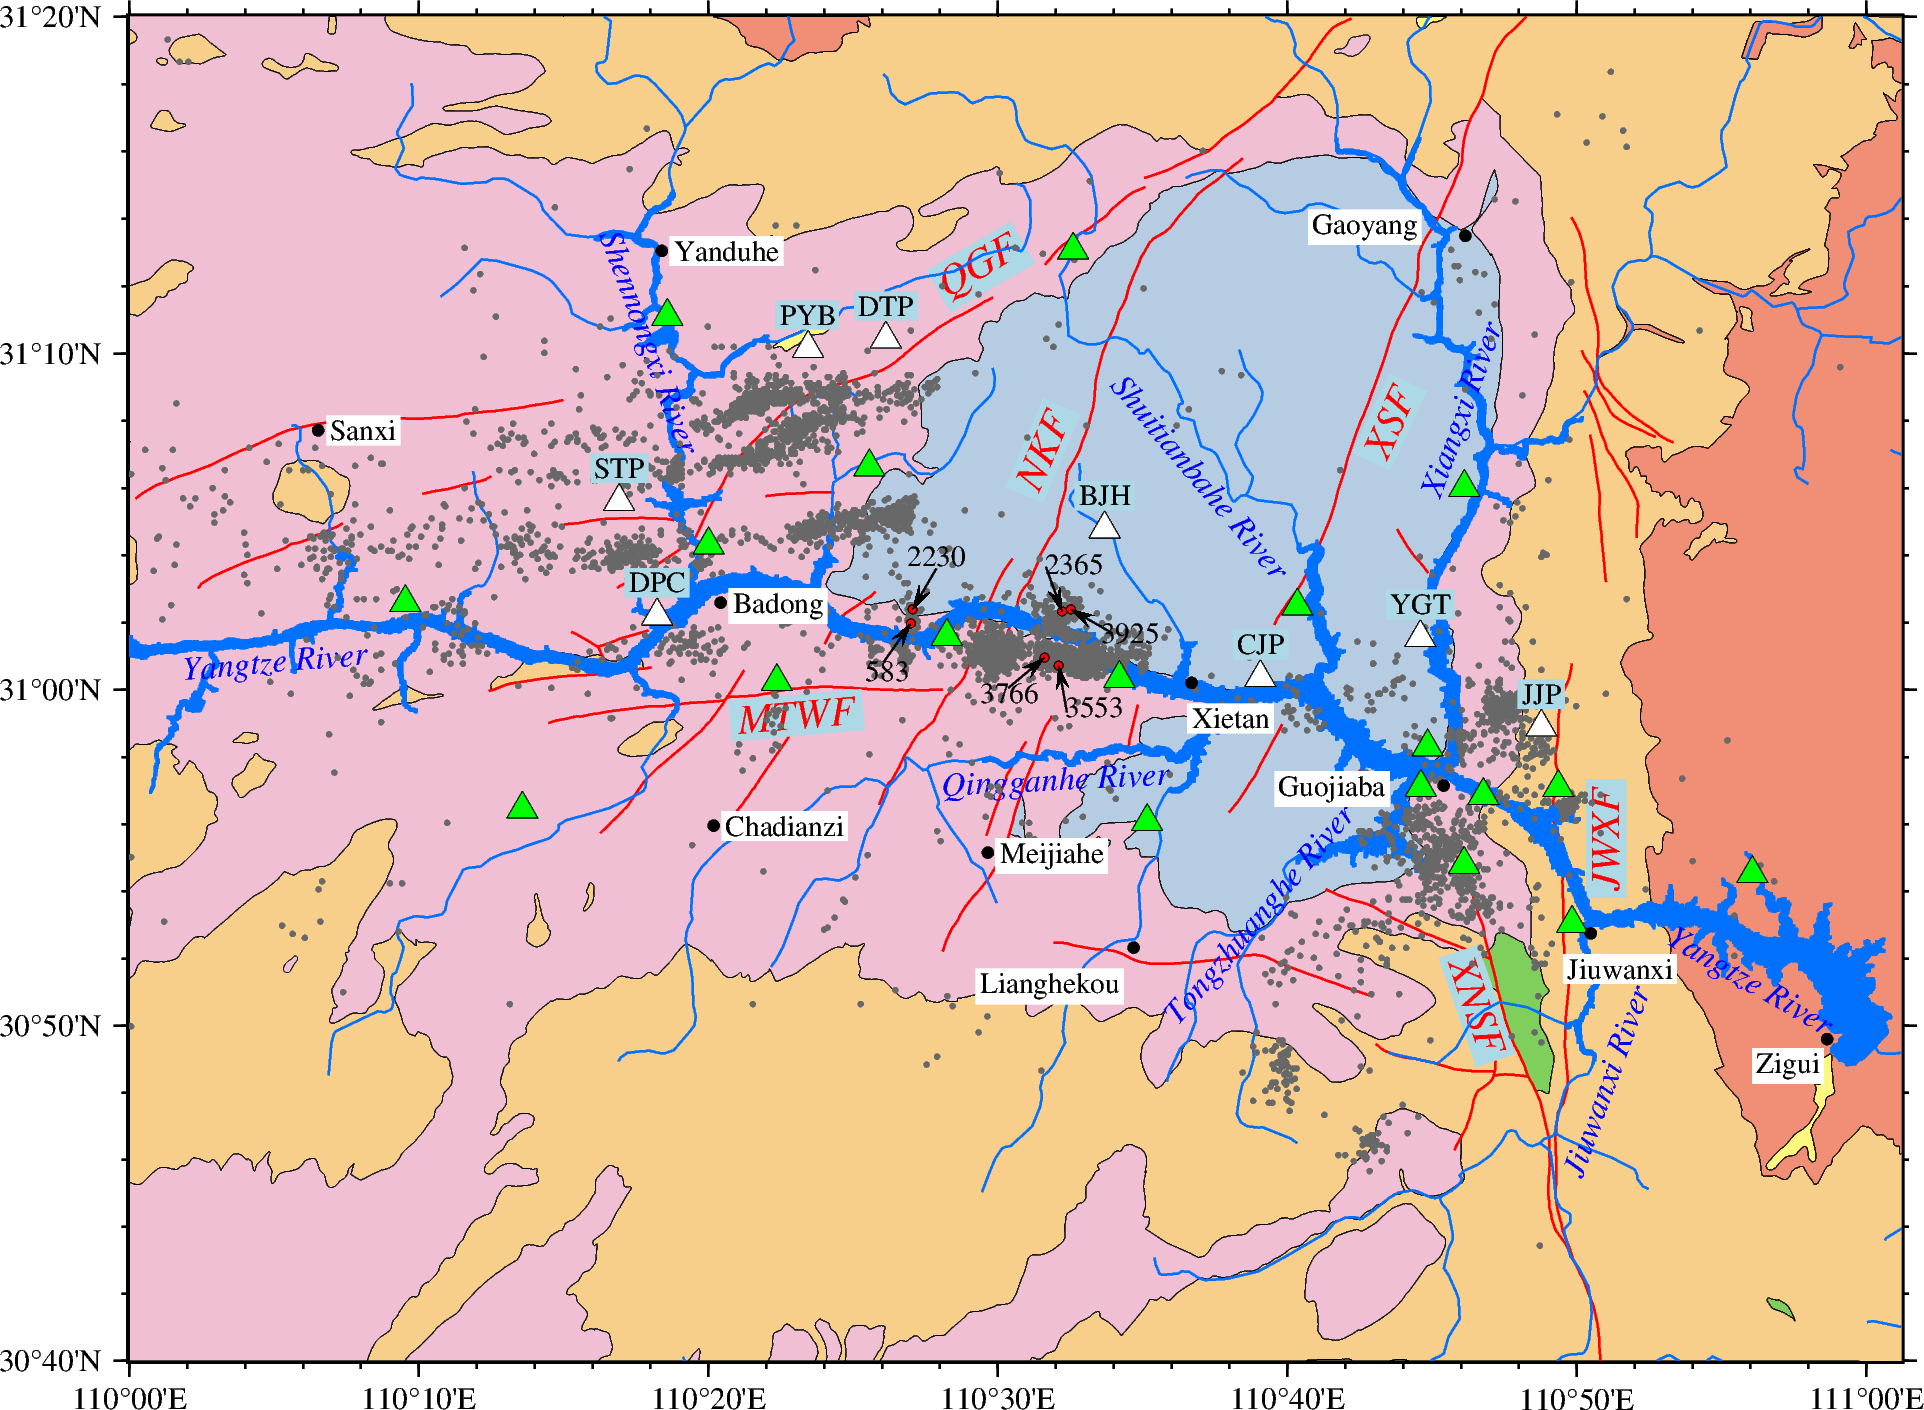

In [10]:
# plot events pairs
# pairs 1
p1 = catalog[catalog.evtid.isin([583,2230])].copy()
eq1,eq2 = p1[p1.evtid == 583].iloc[0],p1[p1.evtid == 2230].iloc[0]
fig.plot(x=p1.longitude,y=p1.latitude,style='c0.03i',fill='red',pen='0.1p')
fig.plot(data=[[eq1.longitude,eq1.latitude,215,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.evtid,font='7p',justify='MC',offset='-0.2c/-0.4c')
fig.plot(data=[[eq2.longitude,eq2.latitude,30,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq2.longitude,y=eq2.latitude,text=eq2.evtid,font='7p',justify='MC',offset='0.2c/0.45c')

# pairs 2
p1 = catalog[catalog.evtid.isin([2365,3925])].copy()
eq1,eq2 = p1[p1.evtid == 2365].iloc[0],p1[p1.evtid == 3925].iloc[0]
fig.plot(x=p1.longitude,y=p1.latitude,style='c0.03i',fill='red',pen='0.1p')
fig.plot(data=[[eq1.longitude,eq1.latitude,-20,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.evtid,font='7p',justify='MC',offset='0.1c/0.4c')
fig.plot(data=[[eq2.longitude,eq2.latitude,120,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq2.longitude,y=eq2.latitude,text=eq2.evtid,font='7p',justify='MC',offset='0.5c/-0.2c')

# pairs 3
p1 = catalog[catalog.evtid.isin([3766,3553])].copy()
eq1,eq2 = p1[p1.evtid == 3766].iloc[0],p1[p1.evtid == 3553].iloc[0]
fig.plot(x=p1.longitude,y=p1.latitude,style='c0.03i',fill='red',pen='0.1p')
fig.plot(data=[[eq1.longitude,eq1.latitude,230,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.evtid,font='7p',justify='MC',offset='-0.3c/-0.3c')
fig.plot(data=[[eq2.longitude,eq2.latitude,170,0.4]],style='V0.2c+b+h0.8',pen='0.4p',fill='black')
fig.text(x=eq2.longitude,y=eq2.latitude,text=eq2.evtid,font='7p',justify='MC',offset='0.3c/-0.35c')
fig.show()

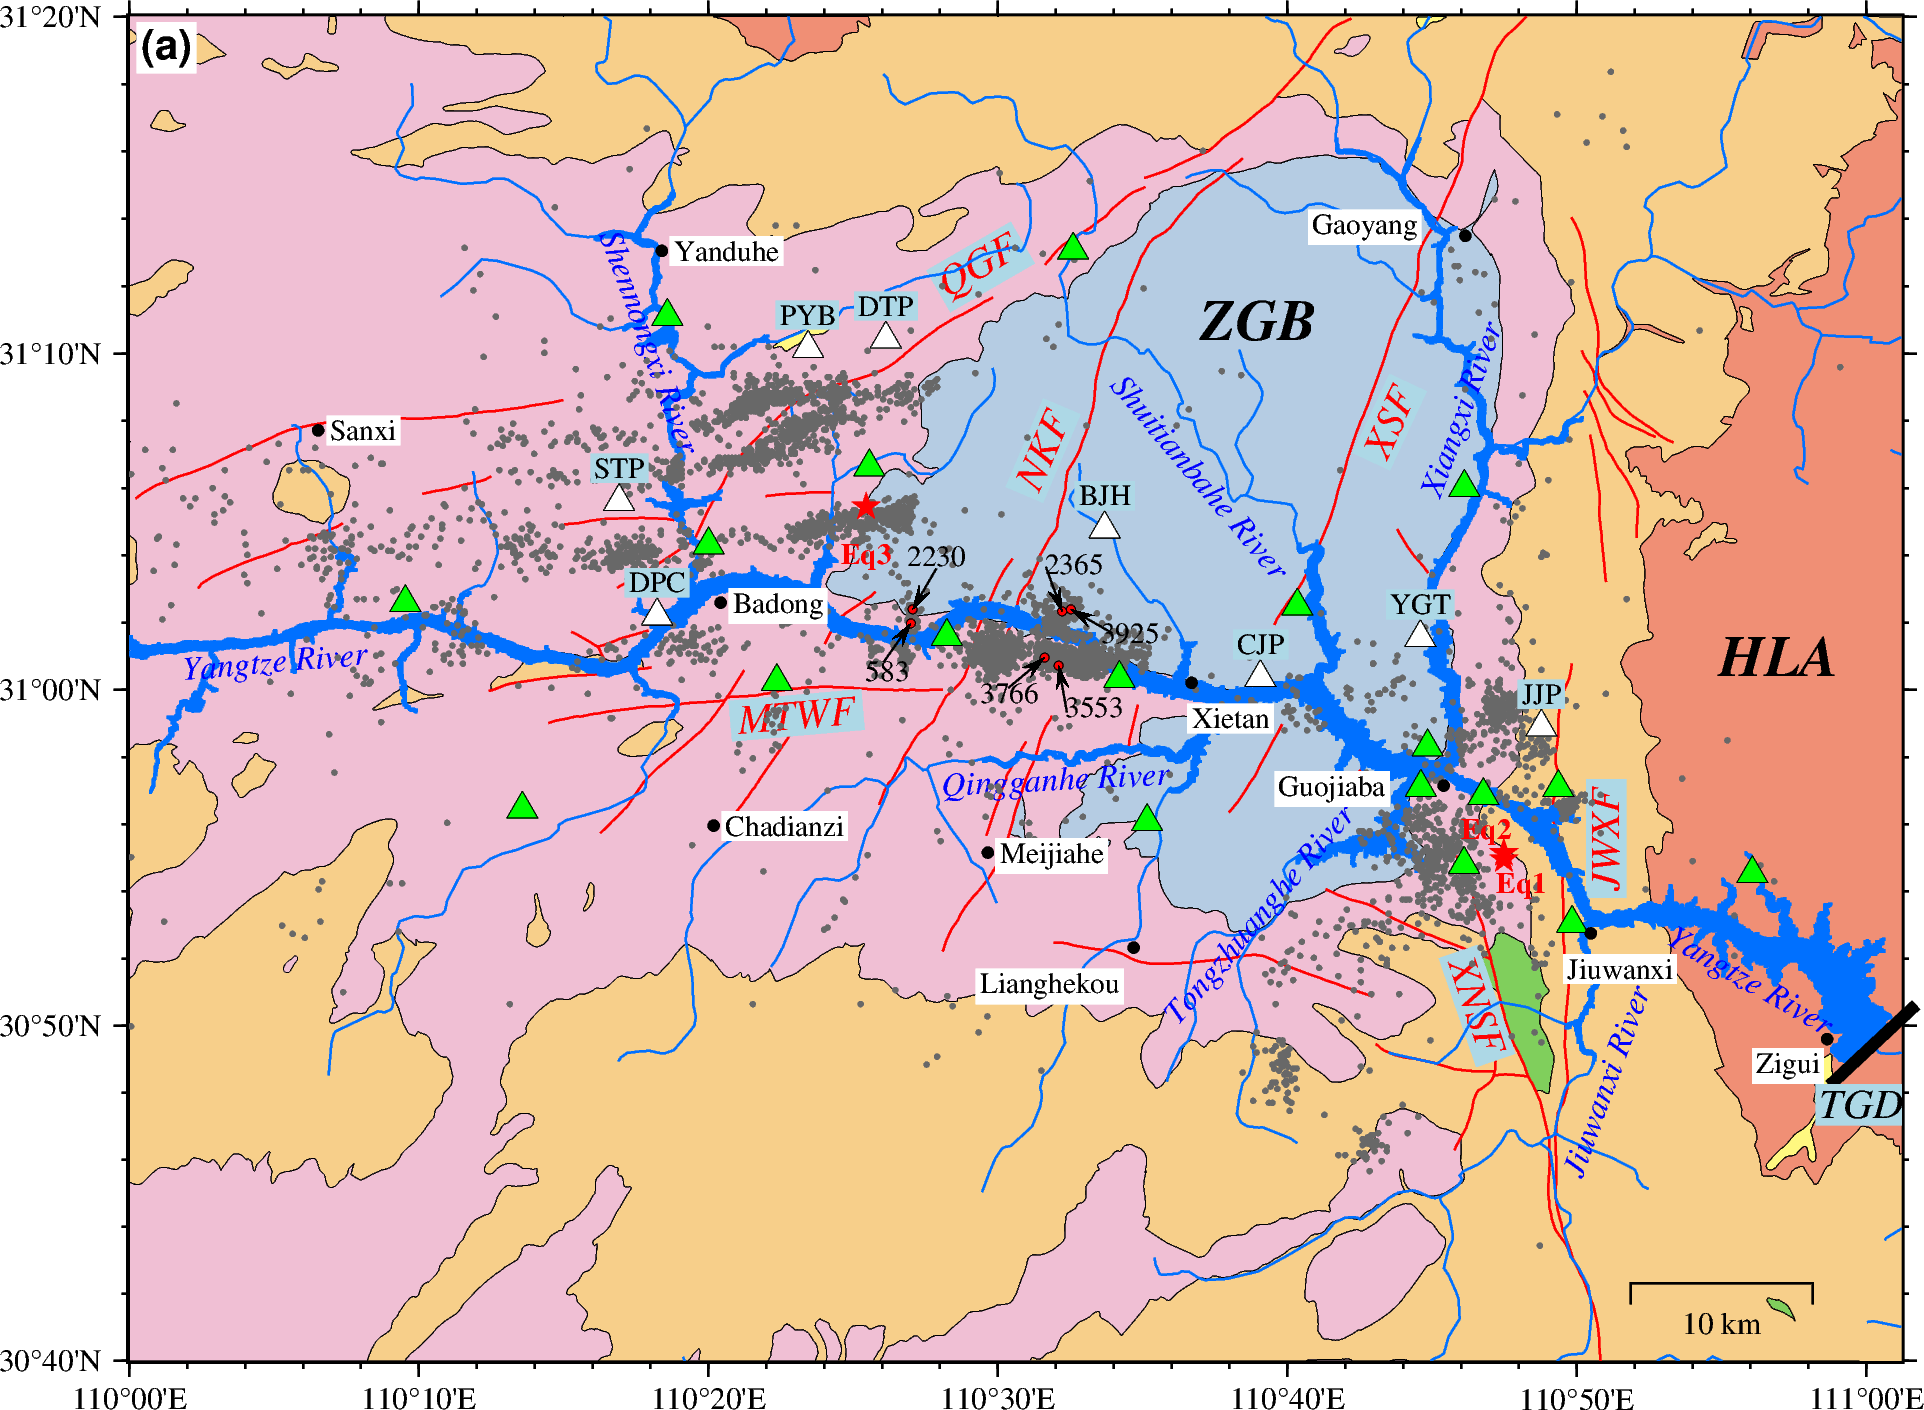

In [11]:
# plot three main earthquakes
fig.plot(x=meca.longitude,y=meca.latitude,style='a0.1i',fill='red')
#fig.text(x=meca.longitude,y=meca.latitude,text=meca.label,font='7p,red',justify='MC',fill='white')
eq1 = meca[meca.label=='Eq1']
#fig.plot(x=eq1.longitude,y=eq1.latitude,style='a0.1i',fill='blue')
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.label,font='7p,5,red',justify='MC',offset='0.15c/-0.2c')
eq1 = meca[meca.label=='Eq2']
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.label,font='7p,5,red',justify='MC',offset='-0.15c/0.2c')
eq1 = meca[meca.label=='Eq3']
fig.text(x=eq1.longitude,y=eq1.latitude,text=eq1.label,font='7p,5,red',justify='MC',offset='0.0c/-0.4c')

# mark the location of TGR
fig.plot(data=[[111.00376,30.823633,43,1,0.1]],style='j',fill='black',no_clip=True)
fig.text(x=111.00376,y=30.823633,text='TGD',font='10p,6,black',justify='MC',offset='-0.1c/-0.5c',fill='lightblue')

# mark the ZGB and HLA
fig.text(x=110+39/60,y=31+11/60,text='ZGB',font='14p,7,black',justify='MC')
fig.text(x=110+57/60,y=31+1/60,text='HLA',font='14p,7,black',justify='MC')

# plot the scale
fig.basemap(map_scale='g110:55/30:42+c110.5/31+w10k+l')
fig.text(position='cTL',text='(a)',font='10p,1',offset='j0.1c/0.1c',fill='white')
fig.show()

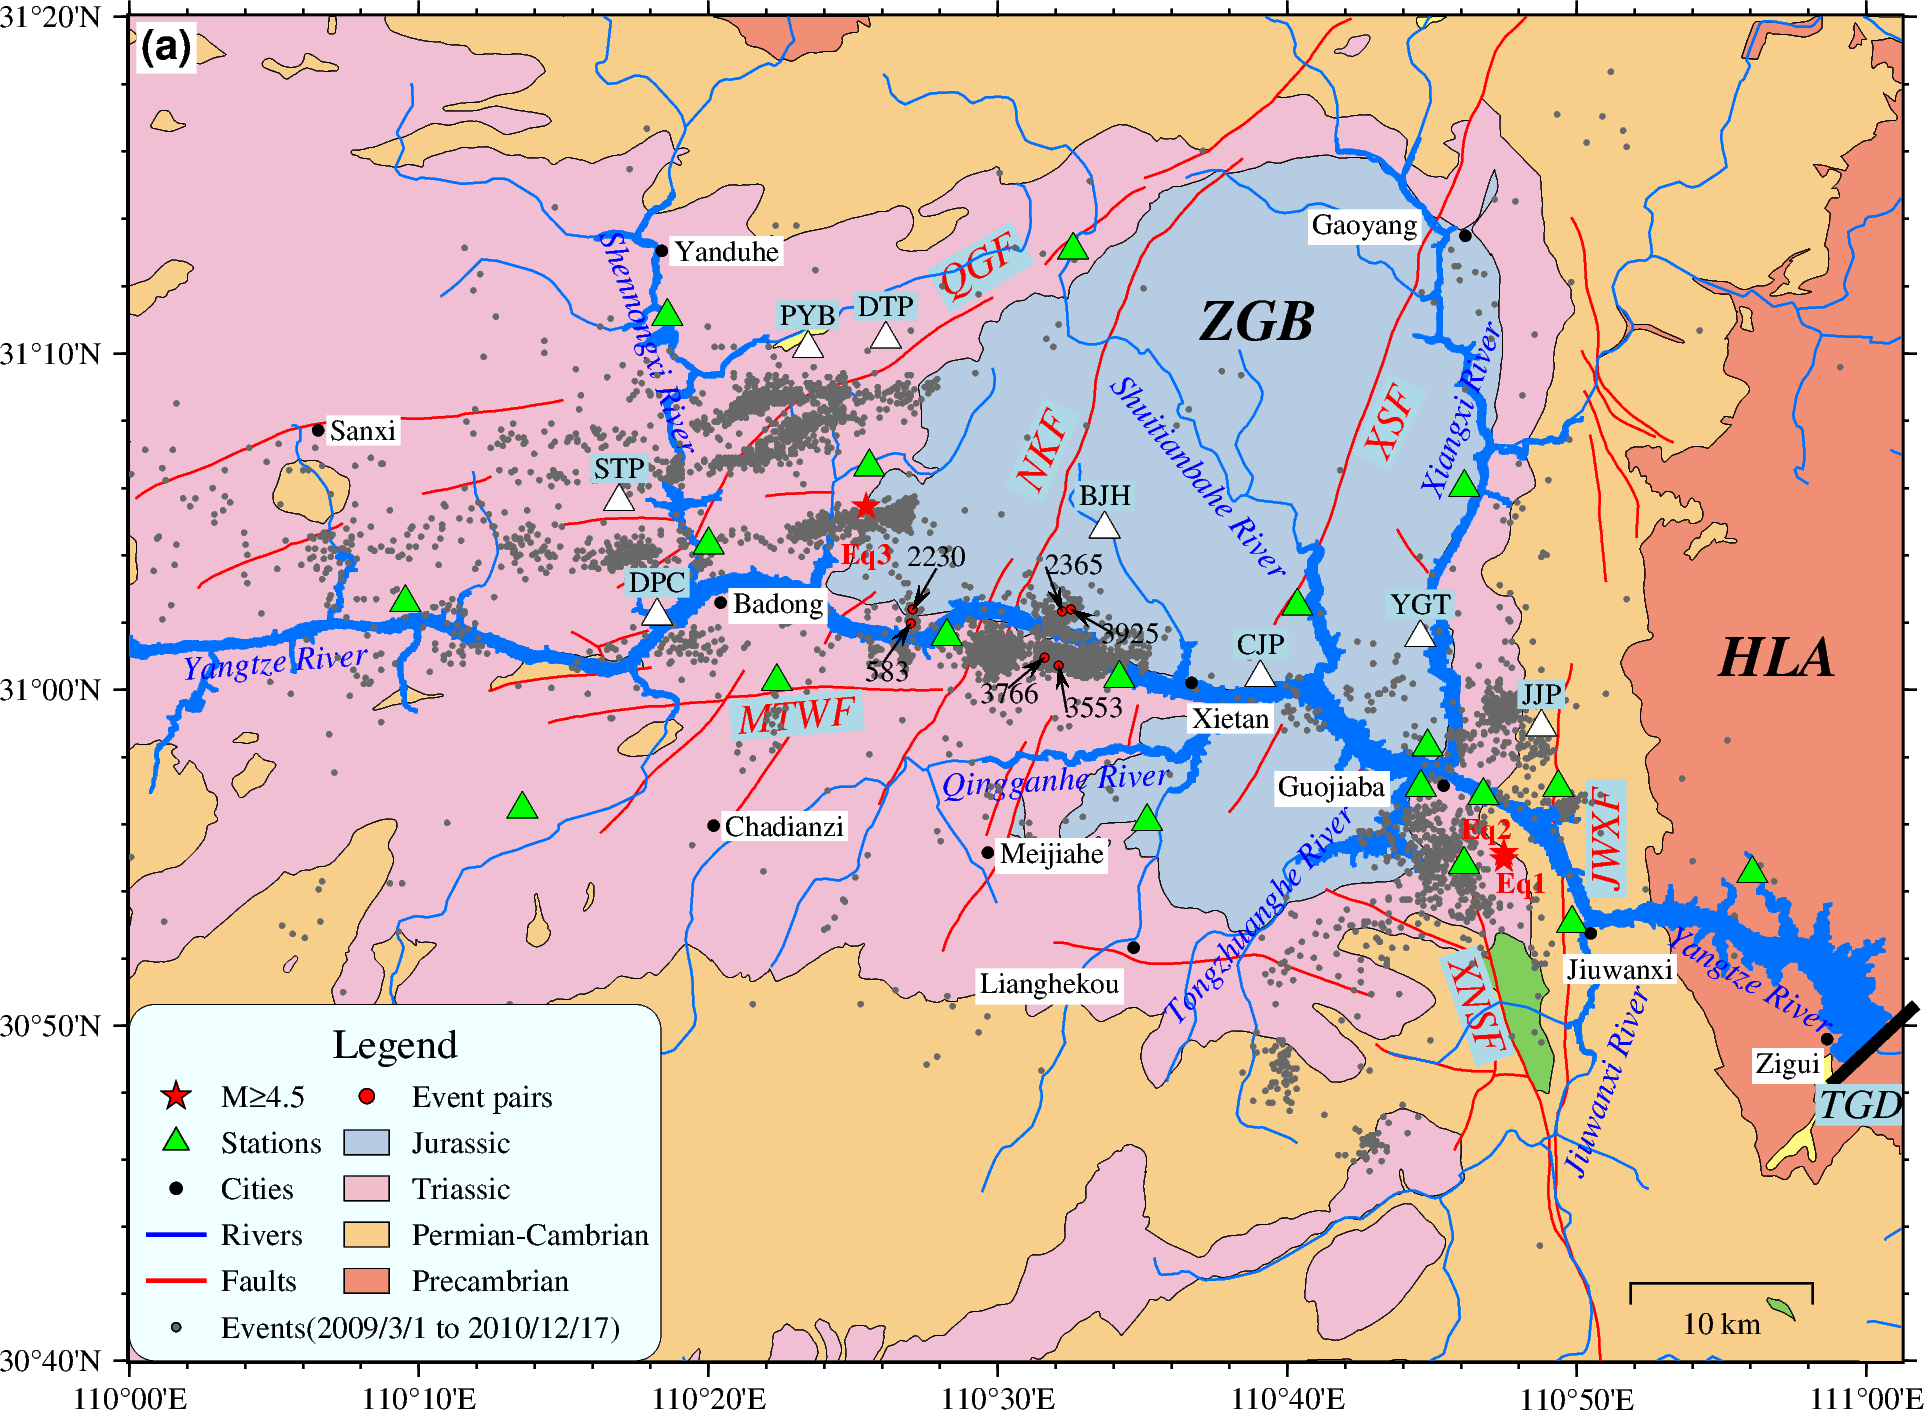

In [13]:
# legend
with open('legend.gmt','w') as fp:
    fp.write('H 10p,4 Legend\n')
    fp.write('N 2\n')
    fp.write('G 0.1\n')
    fp.write('S 0.1i a 0.10i red            0.25p 0.25i M@~\\263@~4.5\n')
    fp.write('S -0.15i c 0.05i red            0.25p 0.00i Event pairs\n')
    fp.write('G 0.1\n')
    fp.write('S 0.1i t 0.10i green          0.25p 0.25i Stations\n')
    fp.write('S -0.15i r 0.15i 181/204/227    0.25p 0.00i Jurassic\n')
    #fp.write('S 0.0i r 0.15i 181/204/227    0.25p 0.20i J\n')

    fp.write('G 0.1\n')
    fp.write('S 0.1i c 0.04i black          0.25p 0.25i Cities\n')
    fp.write('S -0.15i r 0.15i 240/191/202    0.25p 0.00i Triassic\n')
    #fp.write('S 0.0i r 0.15i 240/191/202    0.25p 0.20i T\n')

    fp.write('G 0.1\n')
    fp.write('S 0.1i - 0.20i blue           1p,blue 0.25i Rivers\n')
    fp.write('S -0.15i r 0.15i 247/207/138    0.25p 0.00i Permian-Cambrian\n')
    #fp.write('S 0.0i r 0.15i 247/207/138    0.25p 0.20i P-@%5%@:10:@~\\316@::@%%\n')

    fp.write('G 0.1\n')   
    fp.write('S 0.1i - 0.20i red            1p,red 0.25i Faults\n')
    fp.write('S -0.15i r 0.15i 240/143/117    0.25p 0.00i Precambrian\n')
    #fp.write('S 0.0i r 0.15i 240/143/117    0.25p 0.20i p@%5%@:10:@~\\316@::@%%\n')

    fp.write('G 0.1\n')
    fp.write('S 0.1i c 0.03i 104/104/104    0.25p 0.25i Events(2009/3/1 to 2010/12/17)\n')
fig.legend(spec='legend.gmt',position='jBL+w4.5c',box='+p0.1p+gazure1+r')
try:
    os.remove('legend.gmt')
except:
    pass
fig.show()

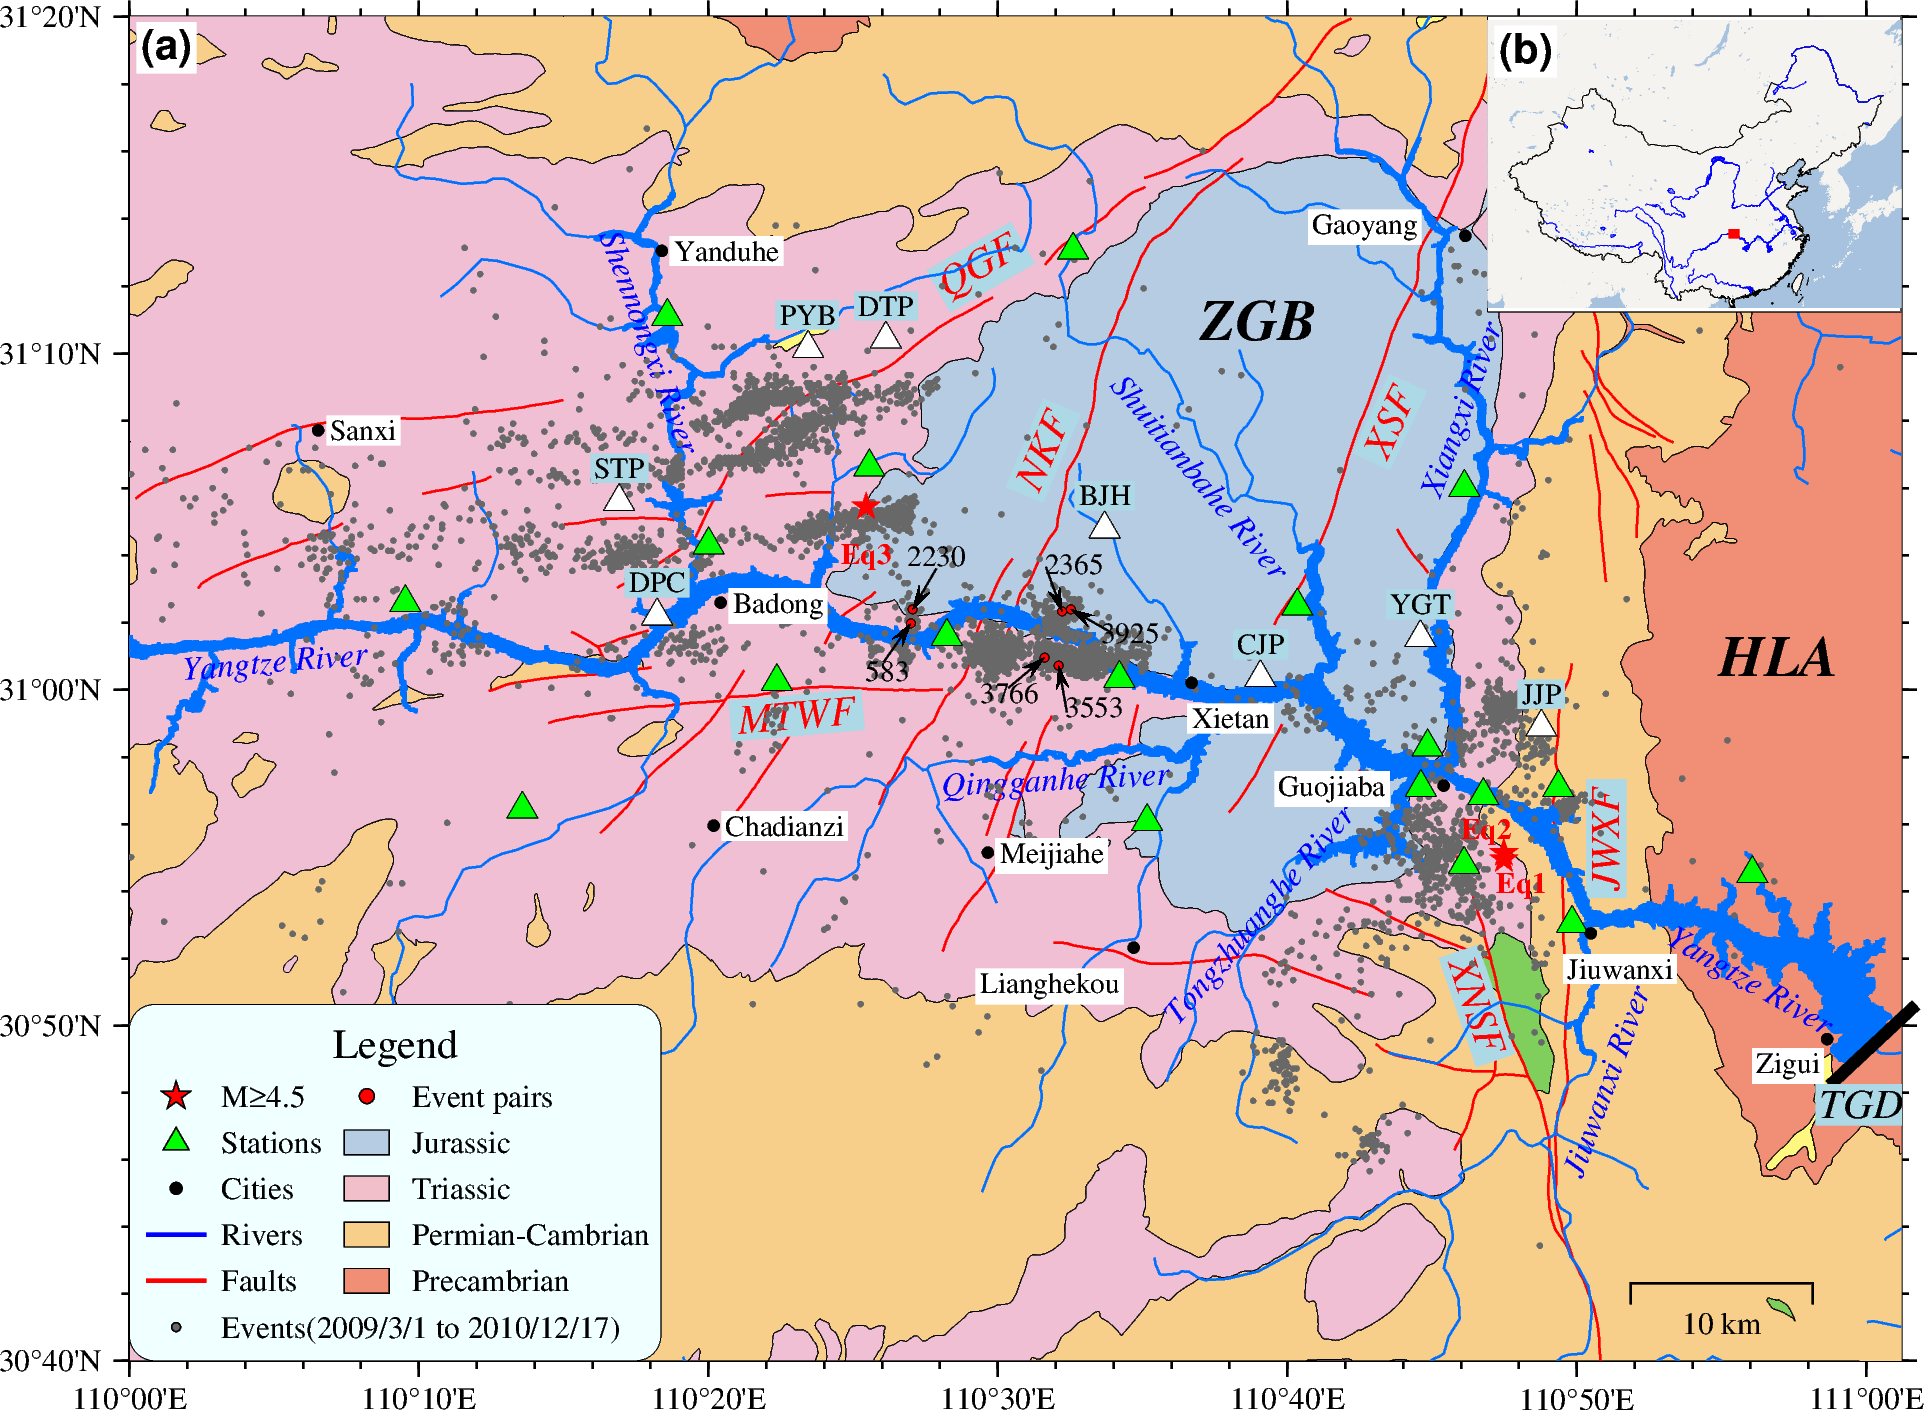

In [73]:
# inset mapview
with fig.inset(position='jTR+w3.5c/2.5c',box='+gwhite+p0.1p'):
    fig.coast(region='70/138/20/56',projection='M?',resolution='h',land='244/243/239',water='167/194/223')
    fig.plot(data='TGR_data/geology/CN-border-L1.gmt',pen='0.1p')
    fig.plot(data='TGR_data/geology/China_rivers.txt',pen='0.1p,blue')
    fig.plot(data=[[110,30+40/60,111.02, 31+20/60]],style='r+s',pen='1.0p,red')
    fig.text(position='cTL',text='(b)',font='10p,1',offset='j0.1c/0.1c',fill='white')
fig.show()

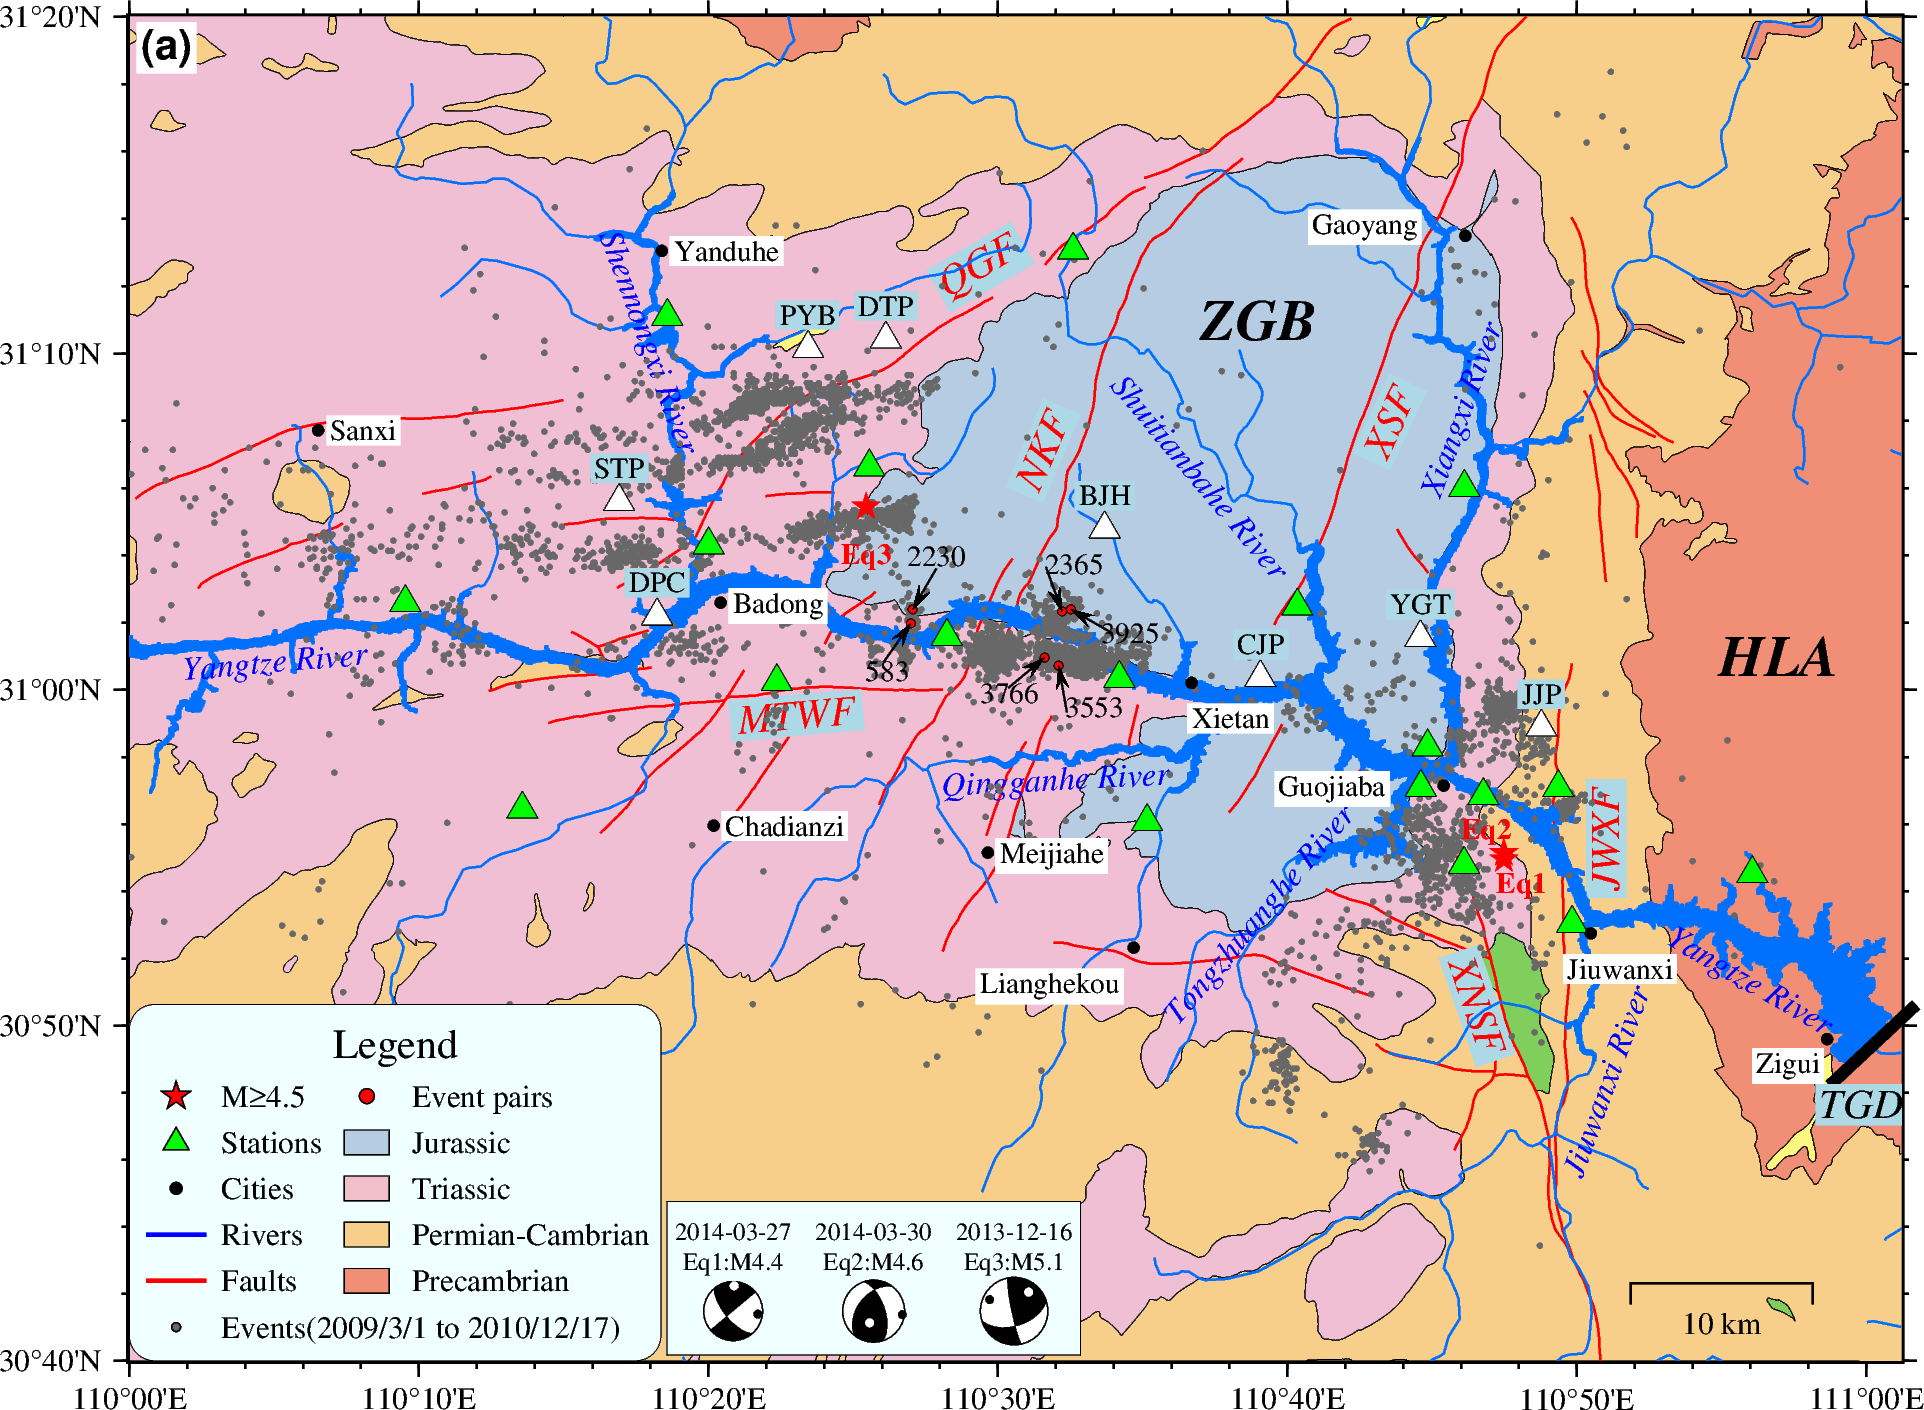

In [14]:
# plot the mechanisms of three eq.
with pygmt.config(MAP_FRAME_PEN='0.1p'):
    #fig.shift_origin(yshift='{}c'.format(map_height-1.3))
    fig.shift_origin(yshift='0.05c',xshift='4.55c')
    fig.basemap(region=[0,1,0,0.7],projection='X3.5c/1.3c',frame=['0','+gazure1'])
    meca = np.array([0.16,0.2,7.7,140,67,0,4.17,0,0])
    fig.meca(spec=meca,scale='0.6c+f6p',convention='aki',F='a2p')
    fig.text(x=meca[0],y=meca[1]+0.4,text='2014-03-27',font='6p,4',justify='TC')
    fig.text(x=meca[0],y=meca[1]+0.4,text='Eq1:M4.4',font='6p,4',justify='TC',offset='0.0c/-0.25c')

    meca = np.array([0.50,0.2,6.5,341,60,52,4.38,0,0])
    fig.meca(spec=meca,scale='0.6c+f6p',convention='aki',F='a2p')
    fig.text(x=meca[0],y=meca[1]+0.4,text='2014-03-30',font='6p,4',justify='TC')
    fig.text(x=meca[0],y=meca[1]+0.4,text='Eq2:M4.6',font='6p,4',justify='TC',offset='0.0c/-0.25c')

    meca = np.array([0.84,0.2,5.2,168,84,37,4.75,0,0])
    fig.meca(spec=meca,scale='0.6c+f6p',convention='aki',F='a2p')
    fig.text(x=meca[0],y=meca[1]+0.4,text='2013-12-16',font='6p,4',justify='TC')
    fig.text(x=meca[0],y=meca[1]+0.4,text='Eq3:M5.1',font='6p,4',justify='TC',offset='0.0c/-0.25c')
fig.show()

In [15]:
# save
fig.savefig('plotting_figures'+os.sep+'Figure1_geology_mapview.png',dpi=600)
fig.savefig('plotting_figures'+os.sep+'Figure1_geology_mapview.pdf')